#**install geopandas**

In [3]:
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Shapely-1.8.0-cp38-cp38-win_amd64.whl (1.1 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\laphouse\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\laphouse\\AppData\\Local\\Temp\\pip-install-631ezob7\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\laphouse\\AppData\\Local\\Temp\\pip-install-631ezob7\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\laphouse\AppData\Local\Temp\pip-pip-egg-info-2xxoaqy3'
         cwd: C:\Users\laphouse\AppData\Local\Temp\pip-install-631ezob7\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for f

#**import packges**

In [2]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt 
import plotly.express as px 
import pandas as pd 
import dash 
import dash_table
import dash_core_componants as dcc

ModuleNotFoundError: No module named 'geopandas'

#**access my drive**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**import the crime csv file frome my drive**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/crime.csv", encoding= 'unicode_escape')

#**represent the data  info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

#**drop null values in data frame**

In [ ]:
df=df.dropna()

#**concatinat longitude and latitude in geometry**

In [ ]:
gdf=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Long ,df.Lat))

#**Show the data after concatinat**

In [ ]:
gdf


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,geometry
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)",POINT (-71.13174 42.25041)
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)",POINT (-71.07215 42.32104)
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)",POINT (-71.08951 42.31569)
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)",POINT (-71.08951 42.31569)
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)",POINT (-71.05784 42.37808)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317369,I152051161,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part One,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)",POINT (-71.06685 42.31781)
317370,I152051161,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)",POINT (-71.06685 42.31781)
317371,I152051161,3125,Warrant Arrests,WARRANT ARREST,B2,238,Y,2015-06-20 00:00:00,2015,6,Saturday,0,Part Three,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)",POINT (-71.06685 42.31781)
317567,I152050961,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,286,Y,2015-06-19 21:20:00,2015,6,Friday,21,Part One,KERR WAY,42.333584,-71.085543,"(42.33358389, -71.08554259)",POINT (-71.08554 42.33358)


In [ ]:
favdata=gdf[['STREET','Lat','Long']]
favdata.drop_duplicates(inplace=True)
favdata

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,STREET,Lat,Long
1295,HILLIS RD,42.250405,-71.131737
1860,DUDLEY ST,42.321042,-71.072153
3259,HOLLANDER ST,42.315689,-71.089514
4107,MCNULTY CT,42.378085,-71.057841
5162,MASSACHUSETTS AVE,42.341870,-71.083722
...,...,...,...
315483,BRENT ST,42.290265,-71.065990
315528,SPENCER ST,42.293843,-71.076094
316374,S MUNROE TER,42.292141,-71.052022
317367,DUDLEY ST,42.317808,-71.066850


#**call the built in the world data frame to show the USA map**

In [ ]:
world_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
world_data.geometry[world_data.name == 'United States of America']

4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
Name: geometry, dtype: geometry

In [ ]:
world_data.to_csv("world.csv")

#**show poston in the USA map**

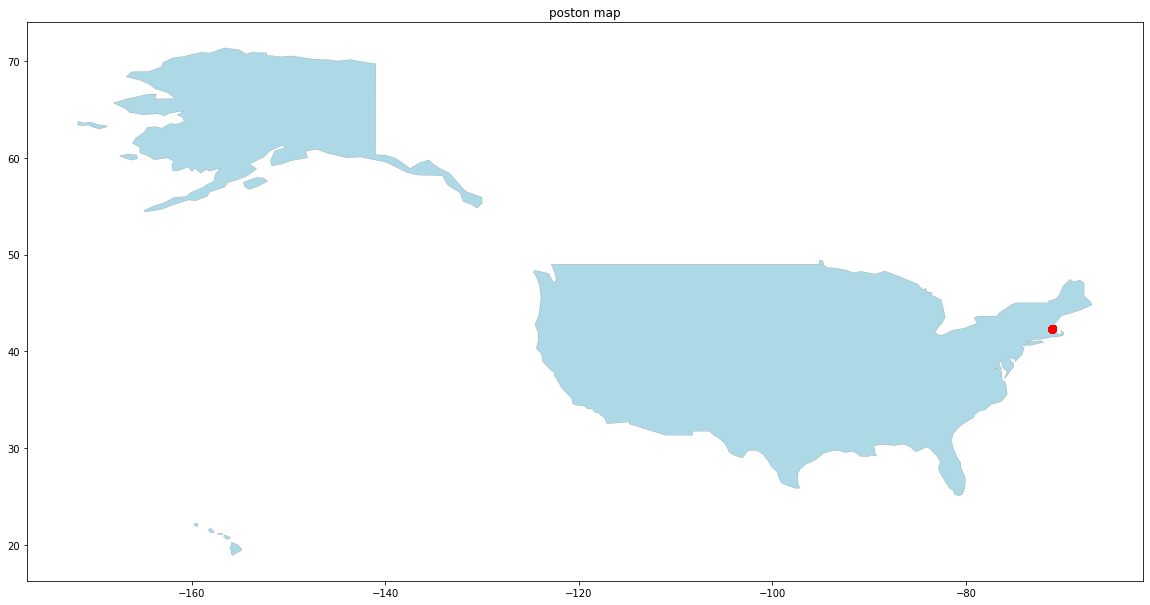

In [ ]:
axis=world_data[world_data.name=='United States of America'].plot(alpha=1 ,color='Lightblue', linewidth=0.1 ,edgecolor='black')
gdf.plot(alpha=1,linewidth=1,ax=axis,color='red',)
plt.title('poston map')
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(20,20)
plt.show()

#**call the built in all cities in the world data frame to builed the poston map**

In [ ]:
cities_data=gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities_data

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


In [ ]:
cities_data.to_csv("cities_data")

#**What is the most common crime area in poston?** 
**the plot show that the middel of poston is the most crime area becouse that The presence of the security forces should be increased in the middel of poston**


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



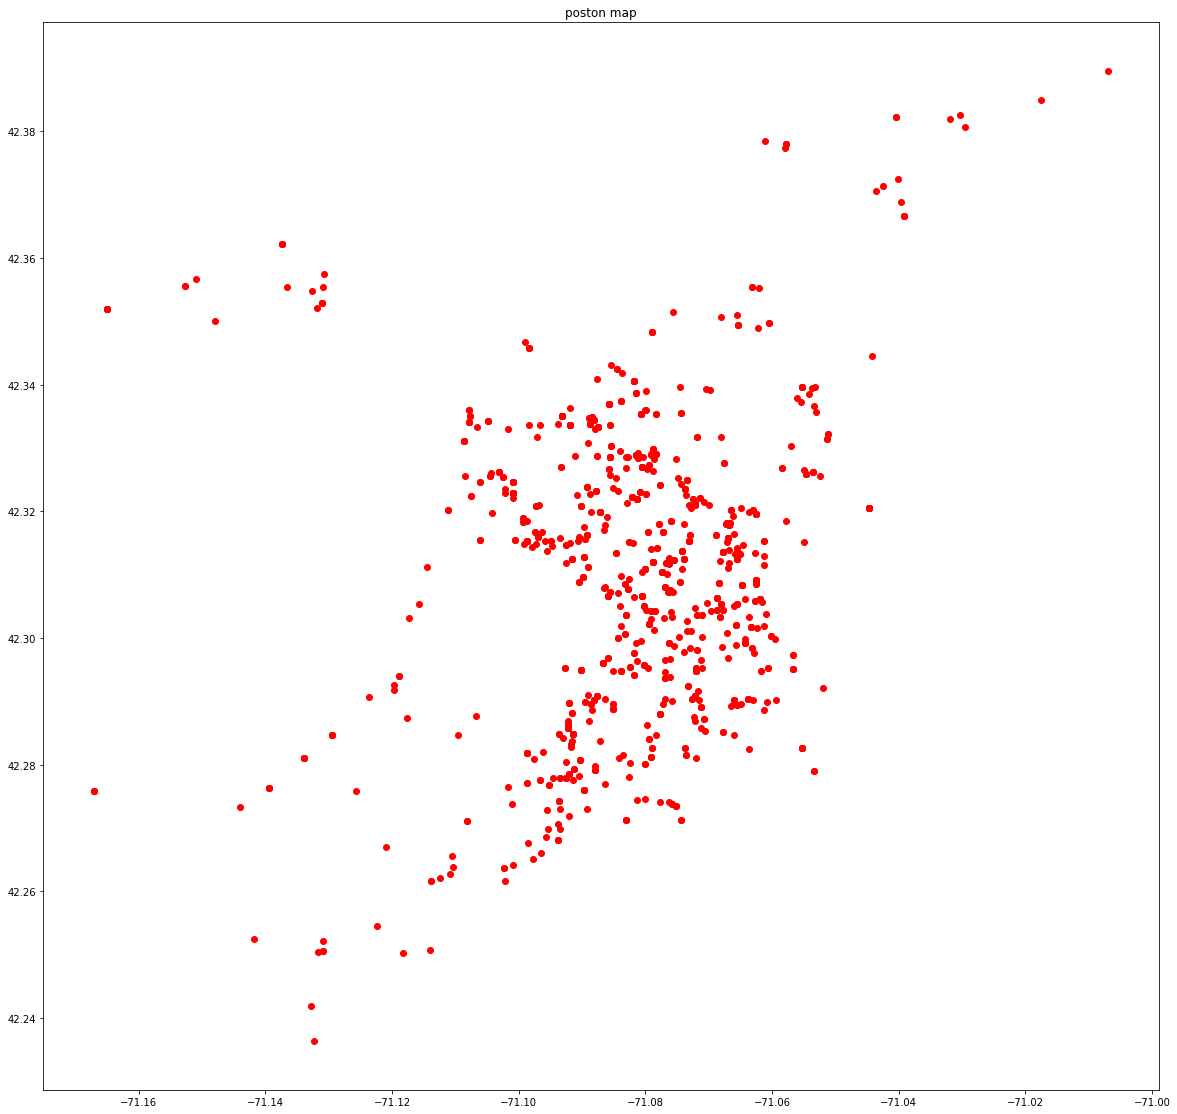

In [ ]:
axis=cities_data[cities_data.name=='poston'].plot(alpha=0.3 ,color='Lightblue', linewidth=0.1 ,edgecolor='black')
gdf.plot(alpha=1,linewidth=1,ax=axis,color='red',)
plt.title('poston map')
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(20,20)
plt.show()

In [177]:
import folium
world = folium.Map(
    zoom_start=2,
    location=[13.133932434766733, 16.103938729508073])
world

In [180]:
city = favdata.iloc[0]
world_all_cities = folium.Map(
    zoom_start=2,
    location=[13.133932434766733, 16.103938729508073]
)

for _, city in favdata.iterrows():
    folium.Marker(
        location=[city['Lat'], city['Long']],
    ).add_to(world_all_cities)

world_all_cities


In [176]:
my_map 